In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio

## d)

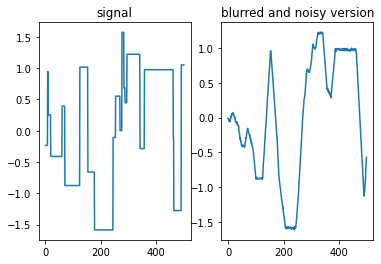

In [2]:
n = 500
k = 30
sigma = 0.01

def generate_noise(n, k, sigma, show_graph = False):
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    
    if show_graph:
        # plot
        f, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title('signal')
        ax1.plot(w)
        ax2.set_title('blurred and noisy version')
        ax2.plot(y[0:n])

        plt.show()
        
    return X, w, y

X, w, y = generate_noise(n, k, sigma, True)

In [209]:
def reg_least_squares(X, w, y, print_msg = False):
    D = np.eye(n)-2*np.diag(np.ones(n-1),-1)+np.diag(np.ones(n-2),-2);
    lams = [0.5, 1, 2, 4, 8, 16, 32, 64]
    errs = np.zeros(len(lams))
    w_hats = []

    for i in range(len(lams)):
        w_hats.append(la.inv(X.T@X - lams[i]*D.T@D)@X.T@y)
        errs[i] = np.mean(np.sum(w - w_hats[i])**2)


    # get best one
    best_idx = np.argmin(errs)
    w_rls = w_hats[best_idx]
    
    if print_msg:
        print("Best Lamda: ", lams[best_idx])
        print("Least Squares Mean Squared Error ", errs[best_idx])
    
    return w_hats[best_idx]

rls_pred = reg_least_squares(X, w, y, True)

Best Lamda:  16
Least Squares Mean Squared Error  0.062365753487521366


In [18]:
X.shape

(529, 500)

The best lambda is smaller and the least squares mean squared error is much smaller

## e) 

$$
w^{k+1} = w^k- 2\tau (X^t(Xw^k - y) + \lambda D^tDw^k)
$$

## f)

Could not get this to work so maybe my equation was wrong

In [264]:
def reg_least_squares_with_gd(X, w, y, print_msg = False):
    D = np.eye(n)-2*np.diag(np.ones(n-1),-1)+np.diag(np.ones(n-2),-2);
    w_hats = []
    lam = 16
    tau = 0.1
    m = X.shape[0]
    
    wk = np.zeros((n, 1))
    for j in range(10):
        wk = wk - 2*tau*(X.T@(y - X@wk) + lam*(D.T@D@wk))
            
    err = np.mean(np.sum(w - wk)**2)
    
    return wk

rls_gd_pred = reg_least_squares_with_gd(X, w, y)